# Análisis de complejidad 

A la hora de diseñar e implementar un algoritmo, se pueden hacer mediciones empíricas de su tiempo de ejecución para corroborar la complejidad computacional que se haya calculado teóricamente. Esto se puede realizar de manera rigurosa a partir de la utilización de [_tests_ estadísticos](https://en.wikipedia.org/wiki/List_of_statistical_tests) (como los vistos en Probabilidad y Estadística) pero también hay algunos métodos más sencillos, como por ejemplo, ajustar la función de complejidad esperada a los datos empíricos y ver el error del ajuste.

In [1]:
# Imports necesarios para el notebook
from random import seed

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()

## Ajuste por cuadrados mínimos

Para ejemplificar, vamos a realizar un ajuste por [cuadrados mínimos](https://en.wikipedia.org/wiki/Least_squares) (como se ve en Álgebra) de los tiempos de ejecución de algunos algoritmos para corroborar que se comportan de acuerdo a la complejidad que se espera.

### Fundamentos matemáticos

Como repaso rápido, el método de cuadrados mínimos consiste en minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por la función ajustada:

<div style="display: flex; flex-direction: column; align-items: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Linear_least_squares2.svg/330px-Linear_least_squares2.svg.png" style="background: white" width="200"/>
</div>

Dados $k$ puntos $p_i = (x_i, y_i)$, definimos el error cuadrático en cada punto como $r_i = \left(y_i - f(x_i)\right)^2$. Queremos encontrar la función $f(x)$ que minimice la suma de estos errores $\left(\sum_{i=0}^k r_i\right)$.

El caso más sencillo es cuando queremos ajustar una recta $f(n) = a \cdot n + b$, que es lo que haríamos si quisieramos corroborar una complejidad lineal, $O(n)$. 

Para ejemplificar con un ejemplo trivial, supongamos que queremos ajustar la recta $f(n)$ a los puntos $(0, 0), (1, 0.75), (2, 2.25)$:

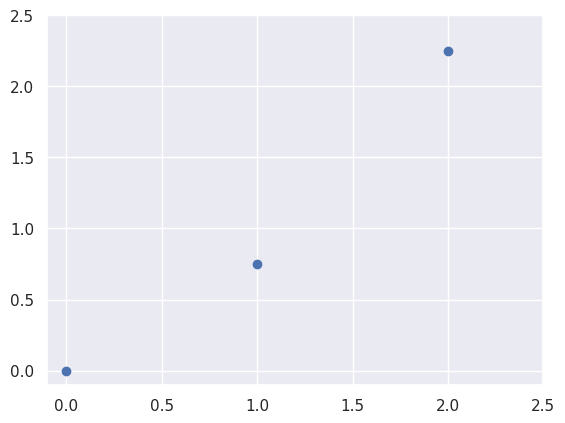

In [2]:
points = ((0, 0), (1, 0.75), (2, 2.25))
x = [point[0] for point in points]
y = [point[1] for point in points]

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, y, "bo")
ax.set_ylim(-0.1, 2.5)
ax.set_xlim(-0.1, 2.5)
None

Se puede encontrar el mejor ajuste por cuadrados mínimos analíticamente (minimizando el error con derivadas, como se vio en Análisis Matemático) o con un enfoque matricial, como se vió en Álgebra. Vamos a utilizar este último camino.

Idealmente, querríamos que $f(x) = c_1 \cdot x + c_2$ tenga los valores correctos en los 3 puntos:

$$
\begin{align*}
f(0) &= 0 = c_1 \cdot 0 + c_2\\
f(1) &= 0.75 = c_1 \cdot 1 + c_2 \\
f(2) &= 2.25 = c_1 \cdot 2 + c_2
\end{align*}
$$

Esto se puede reescribir matricialmente como:

$$
\begin{bmatrix}
0 & 1 \\
1 & 1 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0.75 \\
2.25
\end{bmatrix}
$$

donde:

$$
\begin{align*}
A &= \begin{bmatrix}
0 & 1 \\
1 & 1 \\
2 & 1
\end{bmatrix} &
\bar{x} &= \begin{bmatrix}
c_1 \\
c_2
\end{bmatrix} &
\bar{b} &= \begin{bmatrix}
0 \\
0.75 \\
2.25
\end{bmatrix}
\end{align*}
$$

Para encontrar el mejor ajuste, multiplicamos ambos lados por $A^T$ y resolvemos el sistema $A^T A \bar{x}' = A^T \bar{b}$. Dejamos la demostración de este resultado a la materia de Álgebra. Entonces, nos queda:

$$
\begin{align*}
A^T A &= \begin{bmatrix}
0 & 1 & 2 \\
1 & 1 & 1
\end{bmatrix}

\begin{bmatrix}
0 & 1 \\
1 & 1 \\
2 & 1
\end{bmatrix}
=
\begin{bmatrix}
5 & 3 \\
3 & 3
\end{bmatrix}
\end{align*}
$$

$$
\begin{align*}
A^T b &= \begin{bmatrix}
0 & 1 & 2 \\
1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
0.75 \\
2.25
\end{bmatrix}
=
\begin{bmatrix}
5.25 \\
3
\end{bmatrix}
\end{align*}
$$

Finalmente, invirtiendo la matriz $A^T A$ y multiplicándola a ambos lados, obtenemos:

$$
\begin{align*}
\bar{x}' &= (A^T A)^{-1} A^T \bar{b} \\
&= \begin{bmatrix}
5 & 3 \\
3 & 3
\end{bmatrix}^{-1}
\begin{bmatrix}
5.25 \\
3
\end{bmatrix} \\
&= \begin{bmatrix}
0.5 & -0.5 \\
-0.5 & 5/6
\end{bmatrix}
\begin{bmatrix}
5.25 \\
3
\end{bmatrix} \\
&= \begin{bmatrix}
1.125 \\
-0.125
\end{bmatrix}
\end{align*}
$$

Entonces, el mejor ajuste por cuadrados mínimos es $a(x) = 1.125 \cdot x - 0.125$.

> El error $r=\sum_{i=0}^k \left(y_i - f(x_i)\right)^2$ es igual a la norma al cuadrado del vector $\bar{b} - A \bar{x}'$, es decir, $\left\| \bar{b} - A \bar{x}' \right\|^2$. 

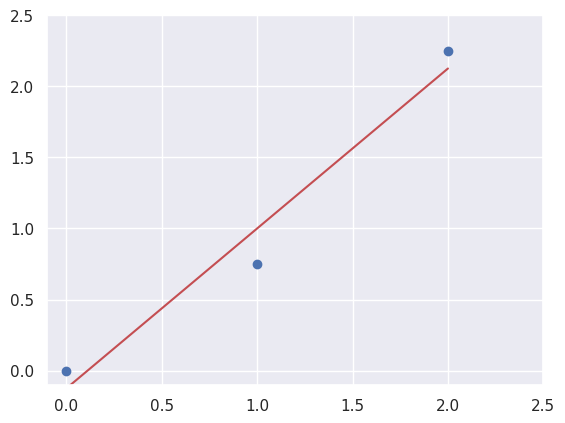

In [3]:
f = lambda x: 1.125 * x  - 0.125
ax.plot([p[0] for p in points], [f(p[0]) for p in points], 'r')
fig

Notar que este método es generalizable a cualquier función $\bar{f}(x) = y = c_1 \cdot f_1(x) + c_2 \cdot f_2(x) + \dots + c_k \cdot f_k(x)$ que se quiera ajustar, no solo rectas, ya que se puede definir una matriz $A$ que contenga los valores de las funciones que se quieren ajustar:

$$
\begin{bmatrix}
f_1(x_1) & f_2(x_1) & \ldots & f_k(x_1) \\
f_1(x_2) & f_2(x_2) & \ldots & f_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \ldots & f_k(x_n)
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2 \\
\vdots \\
c_k
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

Por ejemplo, para ajustar una complejidad de $O(n \log n)$ buscaríamos encontrar $c_1$ y $c_2$ para la función $c_1 \cdot n \log n + c_2$ y nos quedaría:

$$
\begin{bmatrix}
n_1 \log n_1 & 1 \\
n_2 \log n_2 & 1 \\
\vdots & \vdots \\
n_k \log n_k & 1
\end{bmatrix}
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_k
\end{bmatrix}
$$


### Volviendo a TDA: Ajuste de complejidad de algoritmo de ordenamiento

Vamos a hacer mediciones para el algoritmo de ordenamiento de la función `sorted` de Python, para posteriormente realizar un ajuste por cuadrados mínimos y corroborar que su complejidad sea $O(n \log n)$. En el archivo [`util.py`](./util.py) se encuentra el código que mide los tiempos de ejecución de un algoritmo genérico.

In [4]:
def get_random_array(size: int):
    return np.random.randint(0, 100.000, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
x = np.linspace(100, 10_000_000, 20).astype(int)

results = time_algorithm(sorted, x, lambda s: [get_random_array(s)])

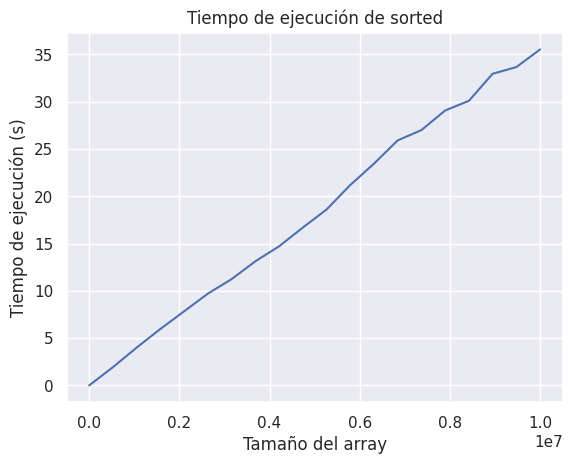

In [5]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de sorted')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

Vamos entonces a calcular el ajuste por cuadrados mínimos como se explicó:

In [6]:
# función a ajustar: c_1 * n * log(n) + c_2

# matriz A, cada fila es (n_i * log(n_i), 1)
A = np.array([[n * np.log(n), 1] for n in x])

# vector b, cada elemento es el tiempo que tardó en ejecutar el algoritmo
b = np.array([results[n] for n in x])

# encontramos traspuesta(A)*A
AtA = A.T @ A

# encontramos traspuesta(A)*b
Atb = A.T @ b

# resolvemos x = (traspuesta(A) * A)^-1 * traspuesta(A) * b
c = np.linalg.inv(AtA) @ Atb

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.linalg.norm(A @ c - b)**2 # || Ax - b ||^2
print(f"Error cuadrático total: {r}") 

c_1 = 2.2199264057090202e-07, c_2 = 0.7695759034611908
Error cuadrático total: 5.962539057225893


Claramente esta no es la única forma de encontrar el resultado, pero quería mostrar que la matemática es muy fácil de implementar. En la prática lo más probable es que usen el ajuste de scipy con la función [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) que hace todo por nosotros:

In [7]:
# scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f = lambda x, c1, c2: c1 * x * np.log(x) + c2 

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x * np.log(x) + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 2.2199264061727768e-07, c_2 = 0.7695758985905342
Error cuadrático total: 5.962539057225875


Podemos ver que salvo por el error de redondeo, el ajuste es idéntico al obtenido manualmente. Vamos a graficar los datos y el ajuste para corroborar que efectivamente se ajusta bien:

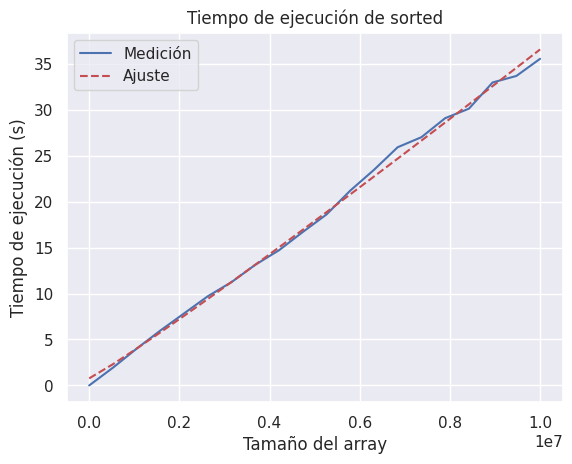

In [8]:
ax.plot(x, [c[0] * n * np.log(n) + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

Finalmente, también es interesante graficar el error para cada tamaño:

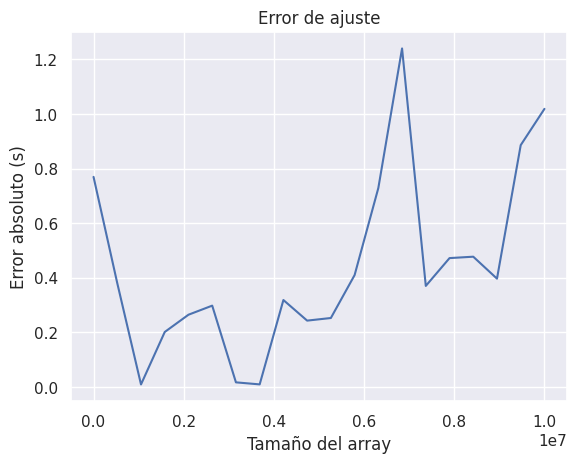

In [9]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n * np.log(n) + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

Es muy interesante ver que para ningún tamaño de entrada el error de nuestro ajuste supera significativamente un segundo, lo cual nos lleva a pensar que efectivamente el algoritmo de ordenamiento que usa el `sorted` Python se comporta como $O(n \log n)$.

### Comparando dos ajustes para un algoritmo

Supongamos que tenemos ahora otro algoritmo de ordenamiento cuya complejidad es $O(n^2)$ pero inicialmente pensamos que era $O(n \log n)$. Al realizar el ajuste por cuadrados mínimos de la función lineal-logarítmica vamos a ver que el error es mucho mayor, y deberíamos sospechar que la complejidad real es distinta. Vamos a hacer el ajuste con ambas funciones:

In [10]:
def bubble_sort(arr):
    # https://i.imgur.com/cI5DVkG.png
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr

In [11]:
# Tamaño mínimo, tamaño máximo, cantidad de puntos
x = np.linspace(100, 5_000, 20).astype(int)
results = time_algorithm(bubble_sort, x, lambda s: [get_random_array(s)])

In [12]:
f_nlogn = lambda x, c1, c2: c1 * x * np.log(x) + c2 
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

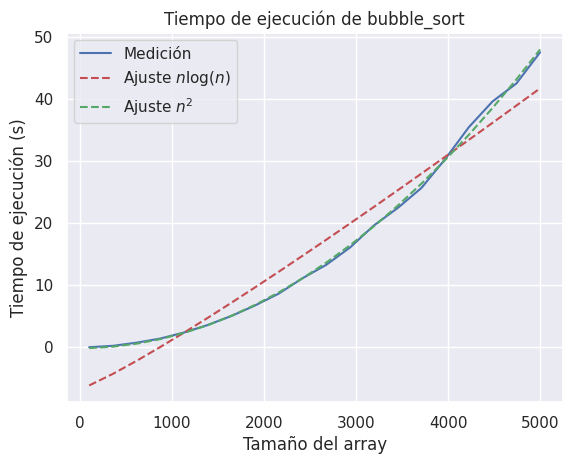

In [13]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medición")
ax.plot(x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], 'r--', label="Ajuste $n \log(n)$")
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], 'g--', label="Ajuste $n^2$")
ax.set_title('Tiempo de ejecución de bubble_sort')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None

Error cuadrático total para n log(n): 224.9984105497726
Error cuadrático total para n^2: 4.295952491252644


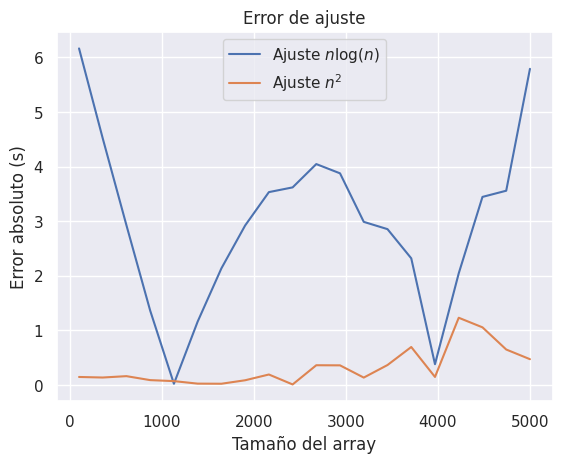

In [16]:
errors_nlogn = [np.abs(c_nlogn[0] * n * np.log(n) + c_nlogn[1] - results[n]) for n in x]
errors_n2 = [np.abs(c_n2[0] * n**2 + c_n2[1] - results[n]) for n in x]

print(f"Error cuadrático total para n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total para n^2: {np.sum(np.power(errors_n2, 2))}")

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, errors_nlogn, label="Ajuste $n \log(n)$")
ax.plot(x, errors_n2, label="Ajuste $n^2$")
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
ax.legend()
None

Observando la suma de los cuadrados de los errores y ambos gráficos, podemos rápidamente ver que la complejidad correcta es $O(n^2)$ y no $O(n \log n)$.

### Comparando dos algoritmos de la misma complejidad

Tenemos dos algoritmos para encontrar el máximo de un arreglo, ambos $O(n)$:

In [20]:
def maximo_iter(datos):
    max_pos = 0
    for i in range(1, len(datos)):
        if datos[i] > datos[max_pos]:
            max_pos = i
    return datos[max_pos]

def maximo_dyc(datos, inicio, fin):
    if inicio == fin:
        return datos[inicio]

    medio = (inicio + fin) // 2
    izq = maximo_dyc(datos, inicio, medio)
    der = maximo_dyc(datos, medio + 1, fin)
    return izq if izq > der else der

Vamos a ajustar una recta a los tiempos de ejecución de ambos algoritmos para corroborar su complejidad.

In [22]:
# Tamaño mínimo, tamaño máximo, cantidad de puntos
x = np.linspace(100, 10_000_000, 20).astype(int)

In [23]:
results_iter = time_algorithm(maximo_iter, x, lambda s: [get_random_array(s)])

In [24]:
results_dyc = time_algorithm(maximo_dyc, x, lambda s: [get_random_array(s), 0, s - 1])

In [25]:
f_lin = lambda x, c1, c2: c1 * x + c2
c_iter, _ = sp.optimize.curve_fit(f_lin, x, [results_iter[n] for n in x])
c_dyc, _ = sp.optimize.curve_fit(f_lin, x, [results_dyc[n] for n in x])

print(f"Algoritmo iterativo: c_1 = {c_iter[0]}, c_2 = {c_iter[1]}")
print(f"Algoritmo división y conquista: c_1 = {c_dyc[0]}, c_2 = {c_dyc[1]}")

Algoritmo iterativo: c_1 = 1.7794502091929943e-06, c_2 = 0.8328376323027429
Algoritmo división y conquista: c_1 = 5.103360341929377e-06, c_2 = 0.20473653488898721


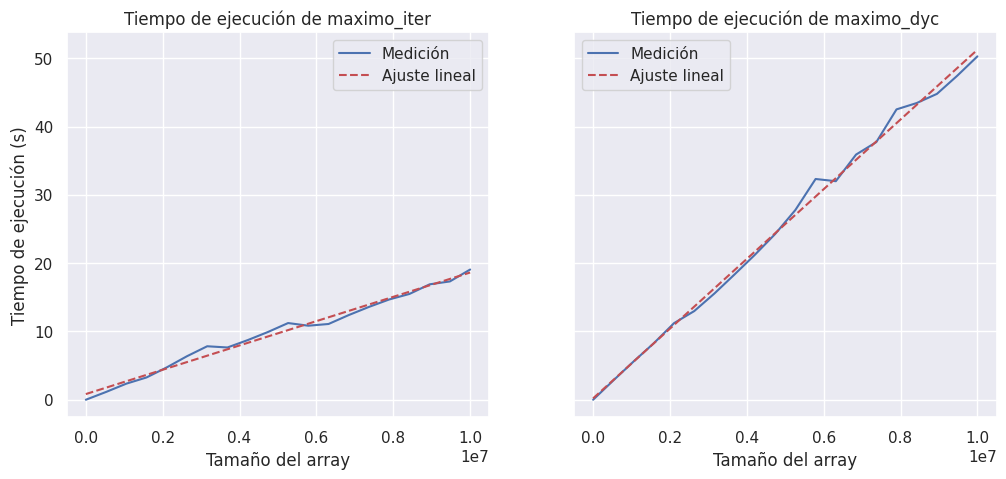

In [29]:
axs: tuple[plt.Axes, plt.Axes]
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].plot(x, [results_iter[n] for n in x], label="Medición")
axs[0].plot(x, [f_lin(n, c_iter[0], c_iter[1]) for n in x], 'r--', label="Ajuste lineal")
axs[0].set_title('Tiempo de ejecución de maximo_iter')
axs[0].set_xlabel('Tamaño del array')
axs[0].set_ylabel('Tiempo de ejecución (s)')
axs[0].legend()

axs[1].plot(x, [results_dyc[n] for n in x], label="Medición")
axs[1].plot(x, [f_lin(n, c_dyc[0], c_dyc[1]) for n in x], 'r--', label="Ajuste lineal")
axs[1].set_title('Tiempo de ejecución de maximo_dyc')
axs[1].set_xlabel('Tamaño del array')
axs[1].legend()
None

Nuevamente, el ajuste es muy bueno, y está claro que ambos algoritmos son $O(n)$. 

Este caso es interesante porque se puede hacer un análisis adicional: si bien ambos algoritmos son lineales, el algoritmo iterativo es más rápido que el de división y conquista. Esto se puede ver no solo en los gráficos sino también en la constante $c_1$ de la recta ajustada, donde para el algoritmo iterativo es considerablemente menor que para el de división y conquista ($1.78$ vs $5.1$ aproximadamente, aunque esto puede variar en cada ejecución).